In [3]:
import numba
import sys
sys.path.insert(0, './../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers

In [4]:
%matplotlib inline

In [5]:
m = n = l = 4 # L of square grid

# With random field

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


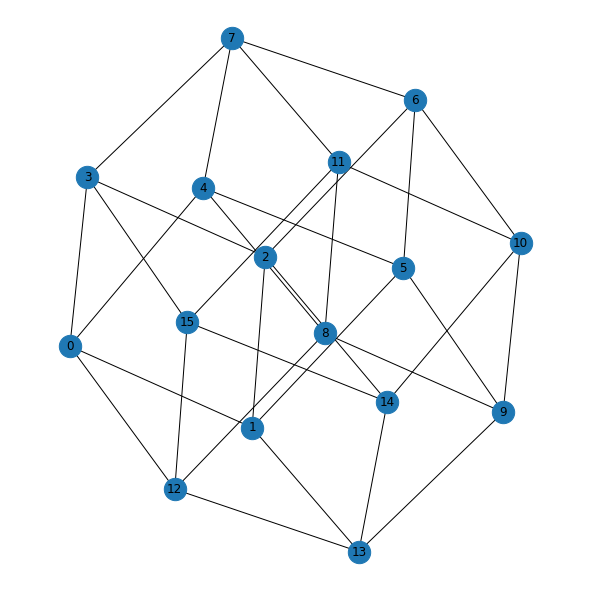

In [6]:
periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)
H_intes = 5
H = 2. * H_intes * np.random.random(N) - H_intes
#H=np.zeros(N)

betas_fast = np.arange(1e-6,2.1,1e-1)

j = graph_gen.spin_glass()
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [8]:

model_rf = model.model(N, H, J, J_interaction)

res_ex_rf = solvers.exact_sol(model_rf, betas_fast)


res_bp_rf= solvers.bp_sol(model_rf, betas_fast)
res_bp_rf["name"]="bp"

beta: 0.0, Fe: -693147.181 Energy: -9.27e-06 M: 2.25e-06 S: 0.693
beta: 0.1, Fe: -7.371 Energy: -0.848 M: 0.205 S: 0.652.18e+022
beta: 0.2, Fe: -4.270 Energy: -1.44 M: 0.355 S: 0.5668.386
beta: 0.3, Fe: -3.393 Energy: -1.8 M: 0.459 S: 0.477-54.37
beta: 0.4, Fe: -3.027 Energy: -2.04 M: 0.561 S: 0.39548.41
beta: 0.5, Fe: -2.847 Energy: -2.2 M: 0.643 S: 0.321-45.53
beta: 0.6, Fe: -2.749 Energy: -2.31 M: 0.712 S: 0.2614.099
beta: 0.7, Fe: -2.693 Energy: -2.38 M: 0.763 S: 0.21643.16
beta: 0.8, Fe: -2.657 Energy: -2.43 M: 0.802 S: 0.18242.55
beta: 0.9, Fe: -2.633 Energy: -2.46 M: 0.833 S: 0.15642.13
beta: 1.0, Fe: -2.617 Energy: -2.48 M: 0.86 S: 0.135-41.99
beta: 1.1, Fe: -2.606 Energy: -2.5 M: 0.882 S: 0.117-41.77
beta: 1.2, Fe: -2.598 Energy: -2.51 M: 0.901 S: 0.10141.66
beta: 1.3, Fe: -2.592 Energy: -2.52 M: 0.918 S: 0.08751.55
beta: 1.4, Fe: -2.587 Energy: -2.53 M: 0.932 S: 0.07561.44
beta: 1.5, Fe: -2.584 Energy: -2.54 M: 0.944 S: 0.06511.33
beta: 1.6, Fe: -2.581 Energy: -2.55 M: 0.954 

In [18]:
res_nn_rf = solvers.nn_sol(model_rf, betas_fast, max_step=2000, bias = True, 
                        z2 = False, x_hat_clip = False, batch_size=10000,)
res_nn_rf["name"]="nn"

fe: -693147.190 std_fe: 2.68E+00 M: 0.007 S: 0.693 E: 0.001: 0.00789, B1 = 0.0000000
fe: -7.370 std_fe: 3.70E-02 M: 0.206 S: 0.654 E: -0.834: 0.21, B1 = 0.5055
fe: -4.265 std_fe: 5.52E-02 M: 0.357 S: 0.568 E: -1.423: 0.356, B1 = 1.191
fe: -3.383 std_fe: 6.09E-02 M: 0.465 S: 0.480 E: -1.782: 0.471, B1 = 1.904
fe: -3.017 std_fe: 5.16E-02 M: 0.579 S: 0.394 E: -2.032: 0.574, B1 = 2.643
fe: -2.840 std_fe: 3.45E-02 M: 0.662 S: 0.313 E: -2.214: 0.664, B1 = 3.448
fe: -2.745 std_fe: 1.76E-02 M: 0.728 S: 0.252 E: -2.326: 0.73, B1 = 4.3000
fe: -2.691 std_fe: 9.55E-03 M: 0.775 S: 0.208 E: -2.393: 0.776, B1 = 5.161
fe: -2.656 std_fe: 5.09E-03 M: 0.809 S: 0.176 E: -2.436: 0.806, B1 = 6.027
fe: -2.633 std_fe: 3.77E-03 M: 0.836 S: 0.153 E: -2.463: 0.835, B1 = 6.930
fe: -2.617 std_fe: 1.21E-03 M: 0.861 S: 0.133 E: -2.485: 0.855, B1 = 7.740
fe: -2.606 std_fe: 1.37E-03 M: 0.884 S: 0.116 E: -2.500: 0.884, B1 = 8.645
fe: -2.598 std_fe: 6.01E-04 M: 0.902 S: 0.100 E: -2.514: 0.902, B1 = 9.504
fe: -2.592 std_

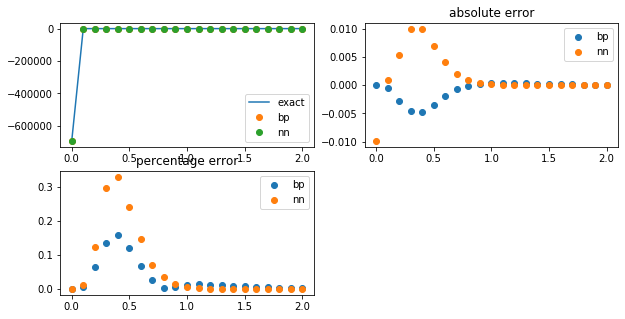

In [19]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, res_ex_rf, [res_bp_rf, res_nn_rf])
#plt.ylim(-0.01,0.01)
plt.show()

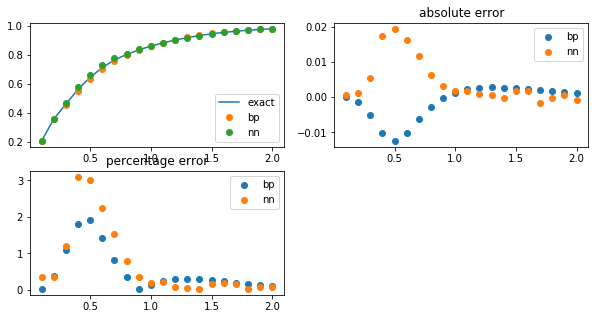

In [20]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex_rf, [res_bp_rf, res_nn_rf], init_=1)
plt.show()

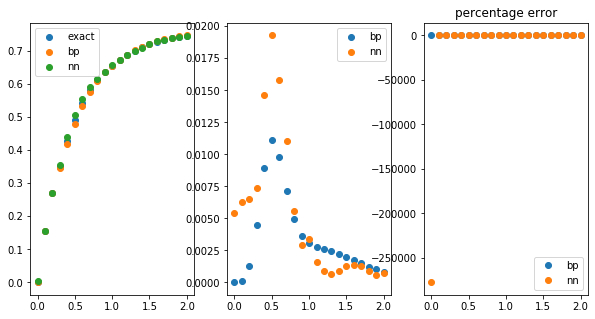

In [21]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex_rf, [res_bp_rf, res_nn_rf])
plt.legend()
plt.show()

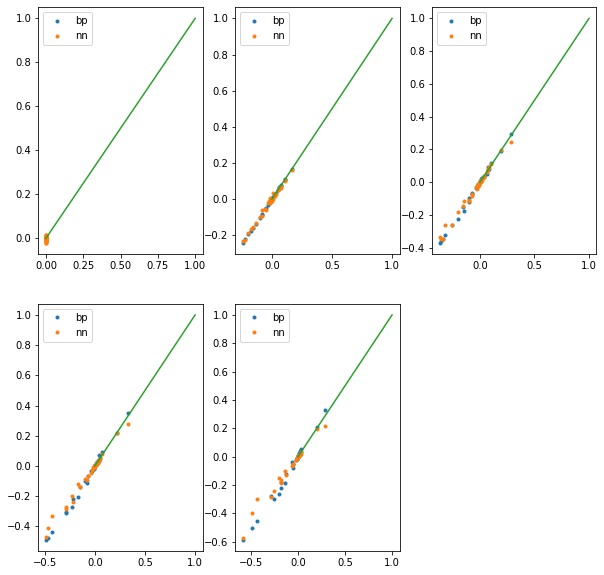

In [22]:
import solvers
import imp
imp.reload(solvers)

plt = solvers.plot_all_corr(betas_fast[5:10], res_ex_rf, [res_bp_rf, res_nn_rf], J_interaction)
plt.show()